In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stat
import pylab
%matplotlib inline

In [3]:
data = pd.read_csv("dataset/historical_data.csv")
data.shape

(197428, 16)

In [4]:
df = data.copy()
df.shape

(197428, 16)

# *EDA*

In [5]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [6]:
df.dtypes

market_id                                       float64
created_at                                       object
actual_delivery_time                             object
store_id                                          int64
store_primary_category                           object
order_protocol                                  float64
total_items                                       int64
subtotal                                          int64
num_distinct_items                                int64
min_item_price                                    int64
max_item_price                                    int64
total_onshift_dashers                           float64
total_busy_dashers                              float64
total_outstanding_orders                        float64
estimated_order_place_duration                    int64
estimated_store_to_consumer_driving_duration    float64
dtype: object

In [7]:
df["created_at"] = pd.to_datetime(df["created_at"])
df["actual_delivery_time"] = pd.to_datetime(df["actual_delivery_time"])
df.dtypes

market_id                                              float64
created_at                                      datetime64[ns]
actual_delivery_time                            datetime64[ns]
store_id                                                 int64
store_primary_category                                  object
order_protocol                                         float64
total_items                                              int64
subtotal                                                 int64
num_distinct_items                                       int64
min_item_price                                           int64
max_item_price                                           int64
total_onshift_dashers                                  float64
total_busy_dashers                                     float64
total_outstanding_orders                               float64
estimated_order_place_duration                           int64
estimated_store_to_consumer_driving_duration           

### *we are predicting estimated time for delivery in seconds* 

In [8]:
df["delivery_time"] = df["actual_delivery_time"] - df["created_at"]
df["delivery_time"] = df["delivery_time"].dt.total_seconds()
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_time
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0


In [9]:
df["delivery_time"].isna().sum()

7

In [10]:
df.dropna(subset=["delivery_time"],inplace=True)
df["delivery_time"].isna().sum()

0

In [11]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_time
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0


In [12]:
df[df["delivery_time"] <= 0]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_time


In [13]:
df.isna().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                0
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
delivery_time                                       0
dtype: int64

In [14]:
df["market_id"].nunique()

6

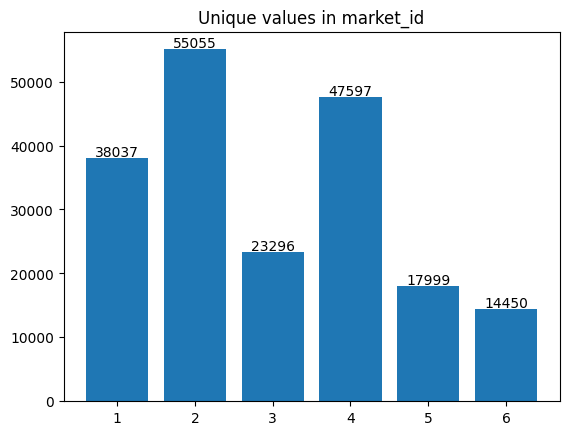

In [15]:
def plot_value_count(val):
    fig, ax = plt.subplots()

    ax.bar(x=df[val].value_counts().index, height=df[val].value_counts().values)
    patches = ax.patches
    for i in range(len(patches)):
        x = patches[i].get_x() + patches[i].get_width() / 2 
        y = patches[i].get_height() + 300

        ax.annotate(df[val].value_counts().values[i], (x,y),ha='center')
        ax.set(title=f"Unique values in {val}")

plot_value_count("market_id")


In [16]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration', 'delivery_time'],
      dtype='object')

In [17]:
def get_nunique():

    for i in df.columns:
        print(f"{i} has unique values : {df[i].nunique()}")

get_nunique()


market_id has unique values : 6
created_at has unique values : 180981
actual_delivery_time has unique values : 178110
store_id has unique values : 6743
store_primary_category has unique values : 74
order_protocol has unique values : 7
total_items has unique values : 57
subtotal has unique values : 8368
num_distinct_items has unique values : 20
min_item_price has unique values : 2312
max_item_price has unique values : 2652
total_onshift_dashers has unique values : 172
total_busy_dashers has unique values : 159
total_outstanding_orders has unique values : 281
estimated_order_place_duration has unique values : 98
estimated_store_to_consumer_driving_duration has unique values : 1336
delivery_time has unique values : 7134


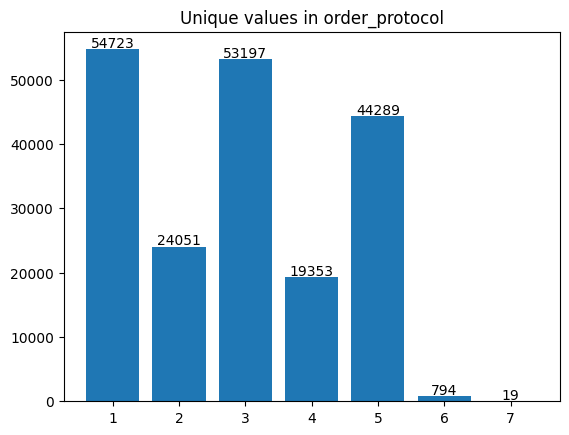

In [18]:
plot_value_count("order_protocol")

In [19]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_time
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0


In [20]:
df["year"] = df['created_at'].dt.year
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_time,year
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,2015
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,2015
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,2015
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,2015
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,2015


In [21]:
df["year"].nunique()

2

In [22]:
df["year"].unique()


array([2015, 2014])

<Axes: xlabel='year'>

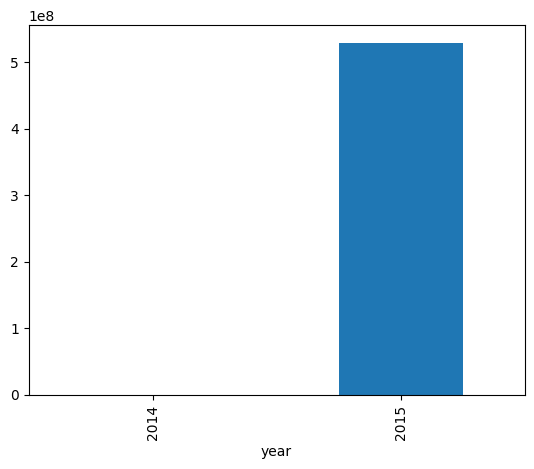

In [23]:
df.groupby(['year'])["subtotal"].sum().plot(kind='bar')

In [24]:
df["year"].value_counts()

year
2015    197420
2014         1
Name: count, dtype: int64

In [25]:
df[df["year"] == 2014]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_time,year
2690,1.0,2014-10-19 05:24:15,2015-01-25 19:11:54,3560,italian,1.0,1,1695,1,1595,1595,NaN,NaN,NaN,446,412.0,8516859.0,2014


In [26]:
df.isna().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                0
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
delivery_time                                       0
year                                                0
dtype: int64

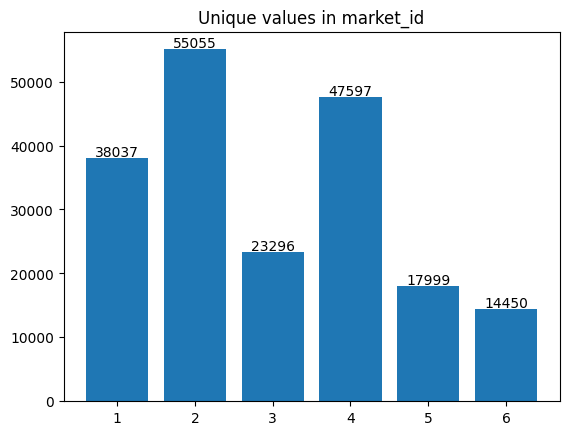

In [27]:
plot_value_count('market_id')

0


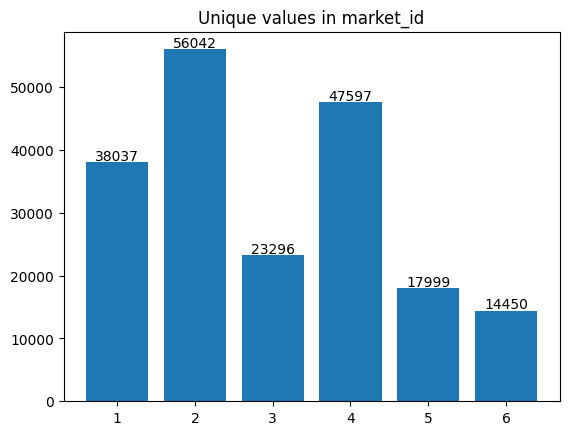

In [28]:
df["market_id"] = df["market_id"].fillna(df['market_id'].mode()[0])
print(df["market_id"].isna().sum())
plot_value_count('market_id')

In [29]:
df.isna().sum().sum()

55067

In [30]:
percent_of_missing_cells = (df.isna().sum().sum()) / df.size * 100
print(round(percent_of_missing_cells,1),"%")

1.5 %


In [31]:
df[df["order_protocol"].isna()]["market_id"].value_counts()

market_id
2.0    635
4.0    126
1.0     91
3.0     54
5.0     49
6.0     40
Name: count, dtype: int64

In [32]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration', 'delivery_time',
       'year'],
      dtype='object')

In [33]:
df["order_protocol"].fillna(df["order_protocol"].mode()[0],inplace=True)
df.isna().sum()

market_id                                           0
created_at                                          0
actual_delivery_time                                0
store_id                                            0
store_primary_category                           4760
order_protocol                                      0
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
delivery_time                                       0
year                                                0
dtype: int64

### *Lets fill the store_primary_category based on store_id* 

In [34]:
store_id_unique = list(df["store_id"].unique())
store_id_unique[:5]

[1845, 5477, 2841, 4139, 5058]

In [35]:
df[df["store_id"] == 5477]["store_primary_category"].mode()

0     indian
1    mexican
Name: store_primary_category, dtype: object

In [36]:
store_id_category = {i : df[df["store_id"] == i].store_primary_category.mode() for i in store_id_unique} 
store_id_category


{1845: 0    american
 Name: store_primary_category, dtype: object,
 5477: 0     indian
 1    mexican
 Name: store_primary_category, dtype: object,
 2841: 0    italian
 Name: store_primary_category, dtype: object,
 4139: 0    mexican
 Name: store_primary_category, dtype: object,
 5058: 0    italian
 Name: store_primary_category, dtype: object,
 4149: 0    sandwich
 1        thai
 Name: store_primary_category, dtype: object,
 3201: 0    cafe
 Name: store_primary_category, dtype: object,
 5054: 0    italian
 Name: store_primary_category, dtype: object,
 2004: 0    american
 Name: store_primary_category, dtype: object,
 1984: 0    chinese
 Name: store_primary_category, dtype: object,
 4905: 0    mexican
 Name: store_primary_category, dtype: object,
 1698: 0    sandwich
 Name: store_primary_category, dtype: object,
 1936: 0    singaporean
 Name: store_primary_category, dtype: object,
 6015: 0    burger
 Name: store_primary_category, dtype: object,
 976: 0    breakfast
 Name: store_primary_c

In [37]:
def fill(store_id):
    try:

        return store_id_category[store_id].values[0]
    except:
        return np.nan 
    
df["non_null_primary_category"] = df.store_id.apply(fill)

In [38]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_time,year,non_null_primary_category
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,2015,american
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,2015,indian
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,2015,indian
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,2015,indian
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,2015,indian


In [39]:
df.isna().sum()

market_id                                           0
created_at                                          0
actual_delivery_time                                0
store_id                                            0
store_primary_category                           4760
order_protocol                                      0
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
delivery_time                                       0
year                                                0
non_null_primary_category   

In [40]:
df.drop("store_primary_category",axis=1,inplace=True)

In [41]:
df.dropna(subset=["total_onshift_dashers"],inplace=True)

In [42]:
df.dropna(axis=0,how='any',inplace=True)

In [43]:
df.isna().sum()

market_id                                       0
created_at                                      0
actual_delivery_time                            0
store_id                                        0
order_protocol                                  0
total_items                                     0
subtotal                                        0
num_distinct_items                              0
min_item_price                                  0
max_item_price                                  0
total_onshift_dashers                           0
total_busy_dashers                              0
total_outstanding_orders                        0
estimated_order_place_duration                  0
estimated_store_to_consumer_driving_duration    0
delivery_time                                   0
year                                            0
non_null_primary_category                       0
dtype: int64

In [44]:
df.select_dtypes("object").nunique()

non_null_primary_category    73
dtype: int64

In [45]:
df["non_null_primary_category"].value_counts()

non_null_primary_category
american             18779
pizza                16103
mexican              15849
burger               10297
sandwich              9164
                     ...  
russian                 10
african                 10
belgian                  2
chocolate                1
alcohol-plus-food        1
Name: count, Length: 73, dtype: int64

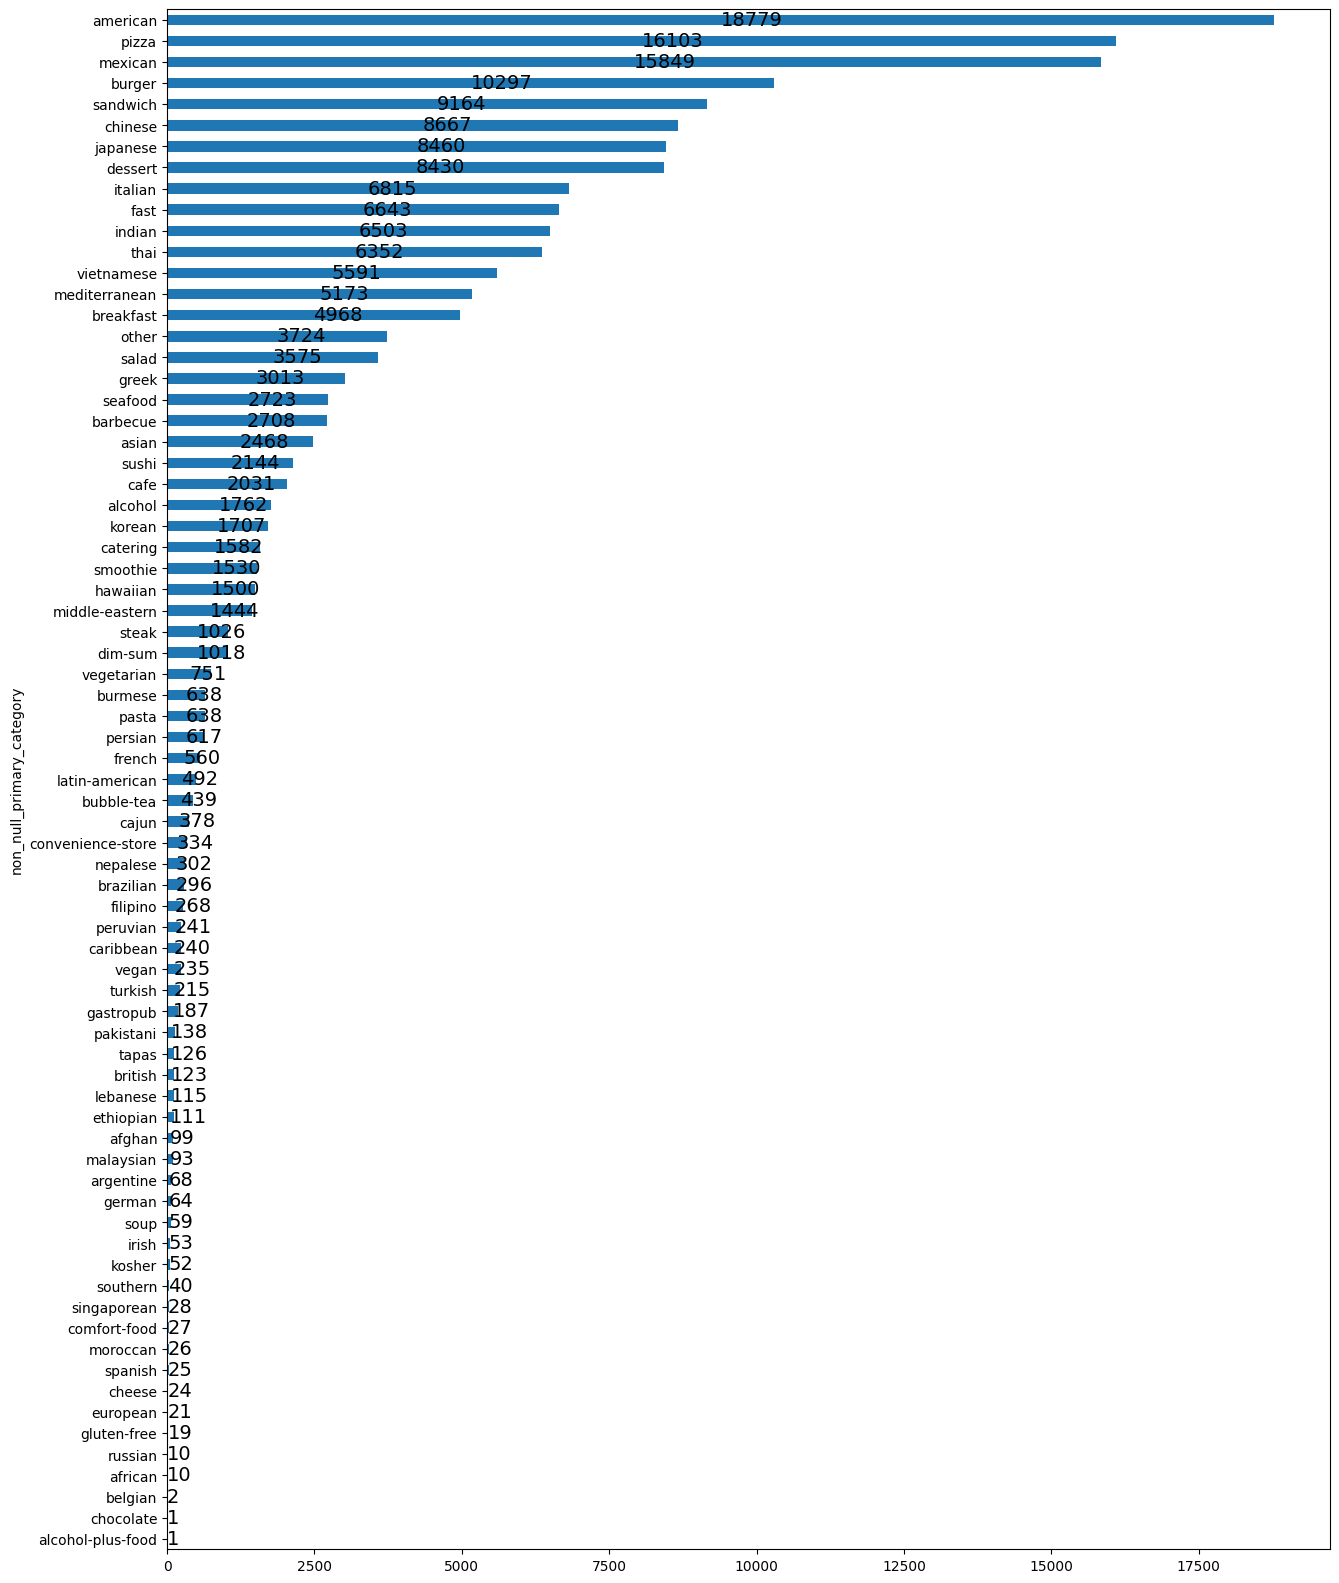

In [46]:
fig, ax = plt.subplots(figsize=(15,20))
df["non_null_primary_category"].value_counts().plot(kind='barh').invert_yaxis()
patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_width() / 2 
    y = patches[i].get_y() + patches[i].get_height() 
    ax.annotate(df["non_null_primary_category"].value_counts().values[i], (x,y),ha='left',fontsize=14)

In [47]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'order_protocol', 'total_items', 'subtotal', 'num_distinct_items',
       'min_item_price', 'max_item_price', 'total_onshift_dashers',
       'total_busy_dashers', 'total_outstanding_orders',
       'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration', 'delivery_time', 'year',
       'non_null_primary_category'],
      dtype='object')

In [48]:
# def plot_plots():
#     for key , val in df.items():
#         if pd.api.types.is_numeric_dtype(val):
#             plt.figure(figsize=(15,5))
#             plt.subplot(1,3,1)
#             sns.histplot(df[key],kde=True)
#             plt.subplot(1,3,2)
#             sns.boxplot(df[key])
#             plt.subplot(1,3,3)
#             stat.probplot(df[key],plot=pylab)

# plot_plots()
        

In [49]:
df.to_csv("dataset/cleaned_file.csv")

In [50]:
data1 = pd.read_csv("dataset/cleaned_file.csv")
data1.shape

(179915, 19)

In [51]:
cleaned_df = data1.copy()
cleaned_df.shape

(179915, 19)

In [52]:
cleaned_df.head()

,Unnamed: 0,market_id,created_at,actual_delivery_time,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_time,year,non_null_primary_category
0,0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,2015,american
1,1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,2015,indian
2,2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,2015,indian
3,3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,2015,indian
4,4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,2015,indian


In [53]:
cleaned_df.columns

Index(['Unnamed: 0', 'market_id', 'created_at', 'actual_delivery_time',
       'store_id', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration', 'delivery_time', 'year',
       'non_null_primary_category'],
      dtype='object')

In [54]:
cleaned_df.drop("Unnamed: 0",axis=1,inplace=True)

In [55]:
cleaned_df.head()

,market_id,created_at,actual_delivery_time,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_time,year,non_null_primary_category
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,2015,american
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,2015,indian
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,2015,indian
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,2015,indian
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,2015,indian


In [56]:
cleaned_df.dtypes

market_id                                       float64
created_at                                       object
actual_delivery_time                             object
store_id                                          int64
order_protocol                                  float64
total_items                                       int64
subtotal                                          int64
num_distinct_items                                int64
min_item_price                                    int64
max_item_price                                    int64
total_onshift_dashers                           float64
total_busy_dashers                              float64
total_outstanding_orders                        float64
estimated_order_place_duration                    int64
estimated_store_to_consumer_driving_duration    float64
delivery_time                                   float64
year                                              int64
non_null_primary_category                       

In [57]:
cleaned_df.isna().sum()

market_id                                       0
created_at                                      0
actual_delivery_time                            0
store_id                                        0
order_protocol                                  0
total_items                                     0
subtotal                                        0
num_distinct_items                              0
min_item_price                                  0
max_item_price                                  0
total_onshift_dashers                           0
total_busy_dashers                              0
total_outstanding_orders                        0
estimated_order_place_duration                  0
estimated_store_to_consumer_driving_duration    0
delivery_time                                   0
year                                            0
non_null_primary_category                       0
dtype: int64

In [58]:
cleaned_df["created_at"] = pd.to_datetime(cleaned_df["created_at"])
cleaned_df["actual_delivery_time"] = pd.to_datetime(cleaned_df["actual_delivery_time"])

In [59]:
cleaned_df["week_day"] = cleaned_df["created_at"].dt.weekday

In [60]:
cleaned_df.head()

,market_id,created_at,actual_delivery_time,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_time,year,non_null_primary_category,week_day
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,2015,american,4
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,2015,indian,1
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,2015,indian,3
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,2015,indian,1
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,2015,indian,6


In [61]:
cleaned_df["day"] = cleaned_df["created_at"].dt.day
cleaned_df.head()

,market_id,created_at,actual_delivery_time,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_time,year,non_null_primary_category,week_day,day
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,2015,american,4,6
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,2015,indian,1,10
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,2015,indian,3,22
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,2015,indian,1,3
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,2015,indian,6,15


In [62]:
cleaned_df["day"].unique()

array([ 6, 10, 22,  3, 15, 28, 31, 12, 16, 18,  2,  7, 25, 27,  8, 17, 13,
       24, 26, 30,  9, 21, 14,  1, 23,  5,  4, 11, 29])

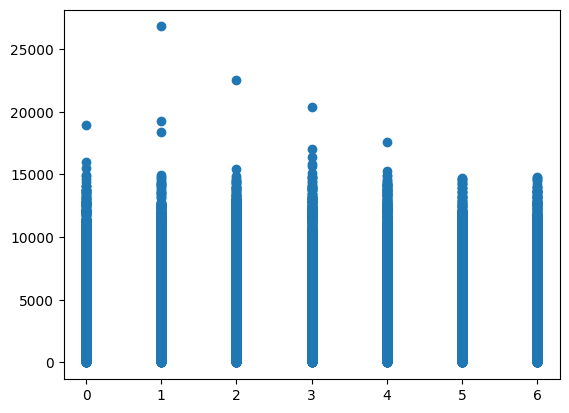

In [63]:
plt.scatter(cleaned_df["week_day"], cleaned_df["subtotal"])

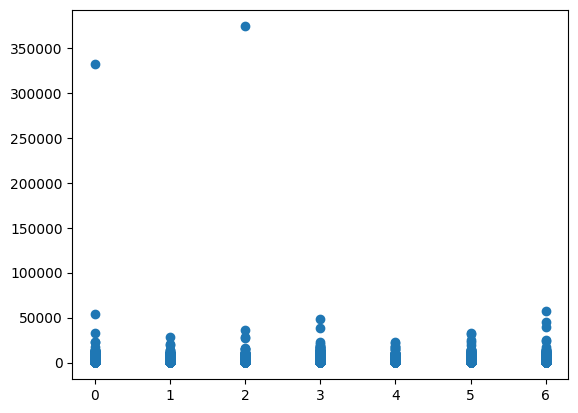

In [64]:
plt.scatter(cleaned_df["week_day"], cleaned_df["delivery_time"])


In [65]:
(cleaned_df["market_id"] == 1).all()

False

In [66]:
for key , val in cleaned_df.items():
    if pd.api.types.is_numeric_dtype(val):
        print(key,(cleaned_df[key].values < 0).any().any())

market_id False
store_id False
order_protocol False
total_items False
subtotal False
num_distinct_items False
min_item_price True
max_item_price False
total_onshift_dashers True
total_busy_dashers True
total_outstanding_orders True
estimated_order_place_duration False
estimated_store_to_consumer_driving_duration False
delivery_time False
year False
week_day False
day False


In [67]:
cleaned_df["time"] = cleaned_df["created_at"].dt.hour
cleaned_df.head()

,market_id,created_at,actual_delivery_time,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,...,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_time,year,non_null_primary_category,week_day,day,time
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,1.0,4,3441,4,557,1239,...,14.0,21.0,446,861.0,3779.0,2015,american,4,6,22
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,2.0,1,1900,1,1400,1400,...,2.0,2.0,446,690.0,4024.0,2015,indian,1,10,21
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,1.0,1,1900,1,1900,1900,...,0.0,0.0,446,690.0,1781.0,2015,indian,3,22,20
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,1.0,6,6900,5,600,1800,...,1.0,2.0,446,289.0,3075.0,2015,indian,1,3,21
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,1.0,3,3900,3,1100,1600,...,6.0,9.0,446,650.0,2390.0,2015,indian,6,15,2


<Axes: xlabel='time'>

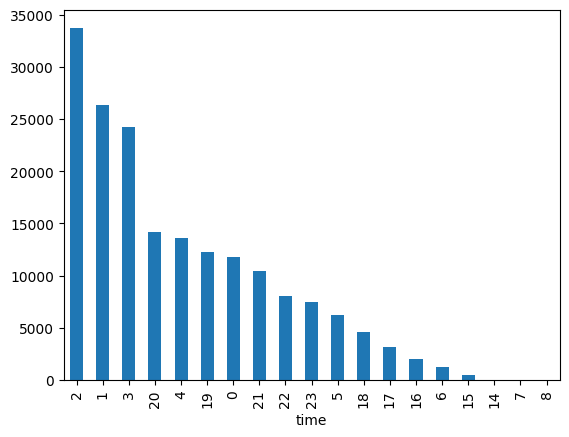

In [68]:
cleaned_df["time"].value_counts().plot(kind='bar')

In [69]:
cleaned_df["time"].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23])

In [70]:
time_subtotal = cleaned_df.groupby(["time"])["subtotal"].sum()
len(time_subtotal.values)

19

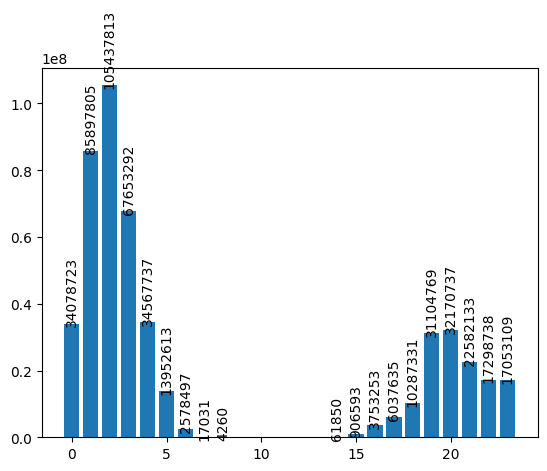

In [71]:
fig , ax = plt.subplots()
ax.bar(time_subtotal.index,time_subtotal.values)
patches = ax.patches 
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2 
    y = patches[i].get_height() + 1 
    ax.annotate(time_subtotal.values[i], (x,y), ha='center',rotation=90)


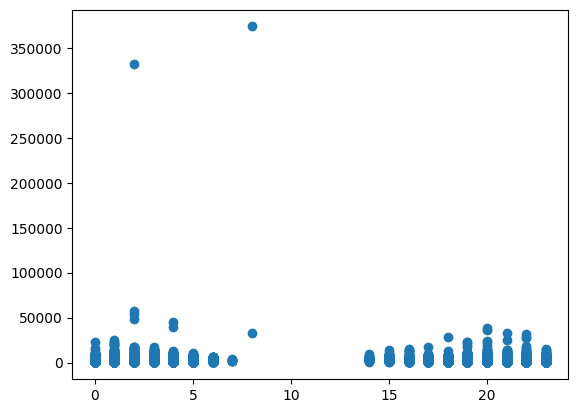

In [72]:
plt.scatter(cleaned_df["time"],cleaned_df["delivery_time"])


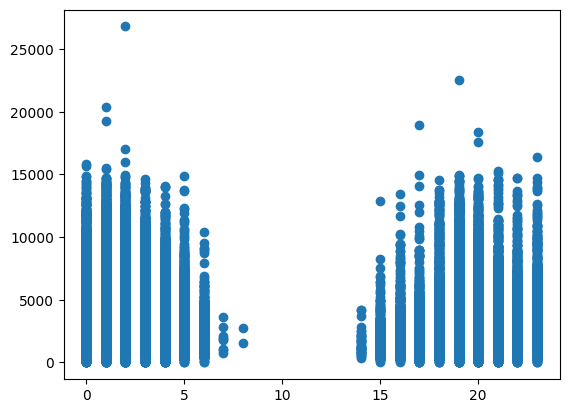

In [73]:
plt.scatter(cleaned_df["time"],cleaned_df["subtotal"])


In [74]:
cleaned_df.groupby("time")["delivery_time"].mean()

time
0       2641.026654
1       2940.060679
2       3310.158817
3       3153.235437
4       2686.641020
5       2428.823417
6       2461.338376
7       2601.222222
8     203284.500000
14      3921.692308
15      3141.070312
16      2843.941802
17      2644.582190
18      2431.477865
19      2763.564178
20      2650.542588
21      2455.654552
22      2518.100732
23      2600.964362
Name: delivery_time, dtype: float64

<Axes: xlabel='delivery_time', ylabel='Count'>

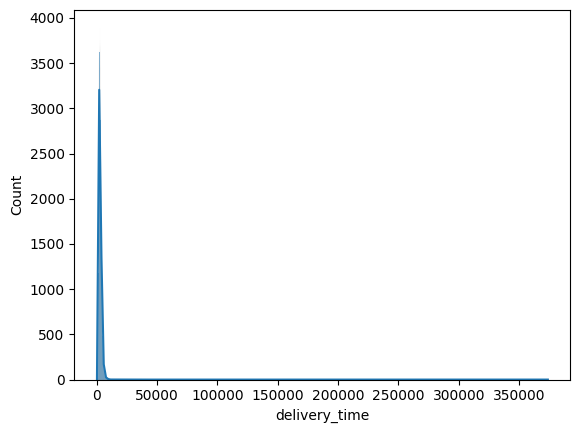

In [75]:
sns.histplot(cleaned_df["delivery_time"],kde=True)

In [76]:
percentile_25 = cleaned_df["delivery_time"].quantile(0.25)
percentile_75 = cleaned_df["delivery_time"].quantile(0.75)
print(percentile_25)
print(percentile_75)

2105.0
3383.0


In [77]:
IQR = percentile_75 - percentile_25 
IQR 

1278.0

In [78]:
upperlimit = percentile_75 + 1.5 * IQR 
lowerlimit = percentile_25 - 1.5 *IQR 
print(upperlimit)
print(lowerlimit)

5300.0
188.0


In [79]:
cleaned_df[cleaned_df["delivery_time"] > upperlimit]

,market_id,created_at,actual_delivery_time,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,...,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_time,year,non_null_primary_category,week_day,day,time
11,3.0,2015-02-16 04:19:33,2015-02-16 06:34:00,5477,1.0,2,2200,2,600,1600,...,3.0,4.0,446,642.0,8067.0,2015,indian,0,16,4
23,1.0,2015-02-02 05:27:49,2015-02-02 07:05:09,5058,1.0,7,14900,5,1200,3900,...,11.0,11.0,446,901.0,5840.0,2015,italian,0,2,5
24,1.0,2015-02-16 02:21:20,2015-02-16 03:54:14,5058,1.0,3,3400,3,1400,2100,...,21.0,39.0,446,501.0,5574.0,2015,italian,0,16,2
88,3.0,2015-02-05 20:05:59,2015-02-05 21:39:16,4905,1.0,2,1706,2,749,789,...,23.0,23.0,446,603.0,5597.0,2015,mexican,3,5,20
115,3.0,2015-01-26 20:18:34,2015-01-26 21:54:44,1698,3.0,3,2925,2,675,1125,...,4.0,6.0,251,427.0,5770.0,2015,sandwich,0,26,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179860,1.0,2015-02-02 21:54:04,2015-02-02 23:41:51,2956,4.0,4,2682,4,357,876,...,26.0,45.0,251,572.0,6467.0,2015,fast,0,2,21
179871,1.0,2015-02-11 22:47:15,2015-02-12 00:32:29,2956,4.0,1,699,1,649,649,...,9.0,9.0,251,821.0,6314.0,2015,fast,2,11,22
179875,1.0,2015-02-02 21:23:44,2015-02-02 23:08:50,2956,4.0,2,703,2,145,339,...,26.0,39.0,251,641.0,6306.0,2015,fast,0,2,21
179903,1.0,2015-02-03 02:07:26,2015-02-03 04:22:00,2956,4.0,5,2325,5,307,610,...,44.0,66.0,251,898.0,8074.0,2015,fast,1,3,2


In [80]:
u = (cleaned_df["delivery_time"].mean()) + (3 * cleaned_df["delivery_time"].std())
u

7817.068788126926

In [81]:
cleaned_df["delivery_time"].mean()

2866.0396353833753

In [82]:
cleaned_df[cleaned_df["delivery_time"] > u ]

,market_id,created_at,actual_delivery_time,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,...,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_time,year,non_null_primary_category,week_day,day,time
11,3.0,2015-02-16 04:19:33,2015-02-16 06:34:00,5477,1.0,2,2200,2,600,1600,...,3.0,4.0,446,642.0,8067.0,2015,indian,0,16,4
435,1.0,2015-02-02 03:21:25,2015-02-02 05:32:27,414,3.0,4,3380,4,385,1395,...,23.0,51.0,251,927.0,7862.0,2015,japanese,0,2,3
1473,4.0,2015-01-23 01:58:06,2015-01-23 04:08:26,4616,1.0,3,3135,3,685,1675,...,59.0,83.0,446,737.0,7820.0,2015,pizza,4,23,1
1877,4.0,2015-02-02 03:04:52,2015-02-02 05:47:27,4616,1.0,2,2940,2,1025,1915,...,48.0,95.0,446,757.0,9755.0,2015,pizza,0,2,3
2146,1.0,2015-02-03 02:49:57,2015-02-03 05:00:15,5589,1.0,9,6985,8,625,1395,...,16.0,40.0,446,534.0,7818.0,2015,other,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178027,2.0,2015-01-31 01:06:41,2015-01-31 03:20:39,5789,5.0,4,7195,4,1099,2399,...,56.0,80.0,251,683.0,8038.0,2015,greek,5,31,1
179443,1.0,2015-02-05 02:11:36,2015-02-05 05:04:44,5658,3.0,7,8025,7,600,1600,...,24.0,23.0,251,1085.0,10388.0,2015,japanese,3,5,2
179467,1.0,2015-02-02 02:13:04,2015-02-02 04:31:26,5658,3.0,3,3700,3,700,2200,...,20.0,30.0,251,992.0,8302.0,2015,japanese,0,2,2
179551,4.0,2015-02-13 21:35:28,2015-02-14 00:03:27,1409,5.0,1,825,1,750,750,...,41.0,45.0,251,467.0,8879.0,2015,vietnamese,4,13,21


In [83]:
cleaned_df.dtypes

market_id                                              float64
created_at                                      datetime64[ns]
actual_delivery_time                            datetime64[ns]
store_id                                                 int64
order_protocol                                         float64
total_items                                              int64
subtotal                                                 int64
num_distinct_items                                       int64
min_item_price                                           int64
max_item_price                                           int64
total_onshift_dashers                                  float64
total_busy_dashers                                     float64
total_outstanding_orders                               float64
estimated_order_place_duration                           int64
estimated_store_to_consumer_driving_duration           float64
delivery_time                                          

In [84]:
from sklearn.preprocessing import TargetEncoder 
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import train_test_split 


In [85]:
cleaned_df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'order_protocol', 'total_items', 'subtotal', 'num_distinct_items',
       'min_item_price', 'max_item_price', 'total_onshift_dashers',
       'total_busy_dashers', 'total_outstanding_orders',
       'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration', 'delivery_time', 'year',
       'non_null_primary_category', 'week_day', 'day', 'time'],
      dtype='object')

In [86]:
num_cols = cleaned_df.dtypes[cleaned_df.dtypes != 'object'].index
num_cols

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'order_protocol', 'total_items', 'subtotal', 'num_distinct_items',
       'min_item_price', 'max_item_price', 'total_onshift_dashers',
       'total_busy_dashers', 'total_outstanding_orders',
       'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration', 'delivery_time', 'year',
       'week_day', 'day', 'time'],
      dtype='object')

In [87]:
num_df = cleaned_df[num_cols]
num_df.head()

,market_id,created_at,actual_delivery_time,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_time,year,week_day,day,time
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,2015,4,6,22
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,2015,1,10,21
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,2015,3,22,20
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,2015,1,3,21
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,2015,6,15,2


## *Checking Redunduncies and Correlation of features*

In [88]:
cor = num_df.corr()
cor_vals = cor["delivery_time"].sort_values(ascending=True)
cor_vals

time                                           -0.116138
order_protocol                                 -0.046532
day                                            -0.043771
market_id                                      -0.038198
store_id                                       -0.005947
week_day                                       -0.000842
min_item_price                                  0.008611
created_at                                      0.027184
actual_delivery_time                            0.029557
total_onshift_dashers                           0.047465
total_busy_dashers                              0.061102
estimated_order_place_duration                  0.068267
total_items                                     0.078580
max_item_price                                  0.088996
num_distinct_items                              0.106686
total_outstanding_orders                        0.122697
subtotal                                        0.144264
estimated_store_to_consumer_dri

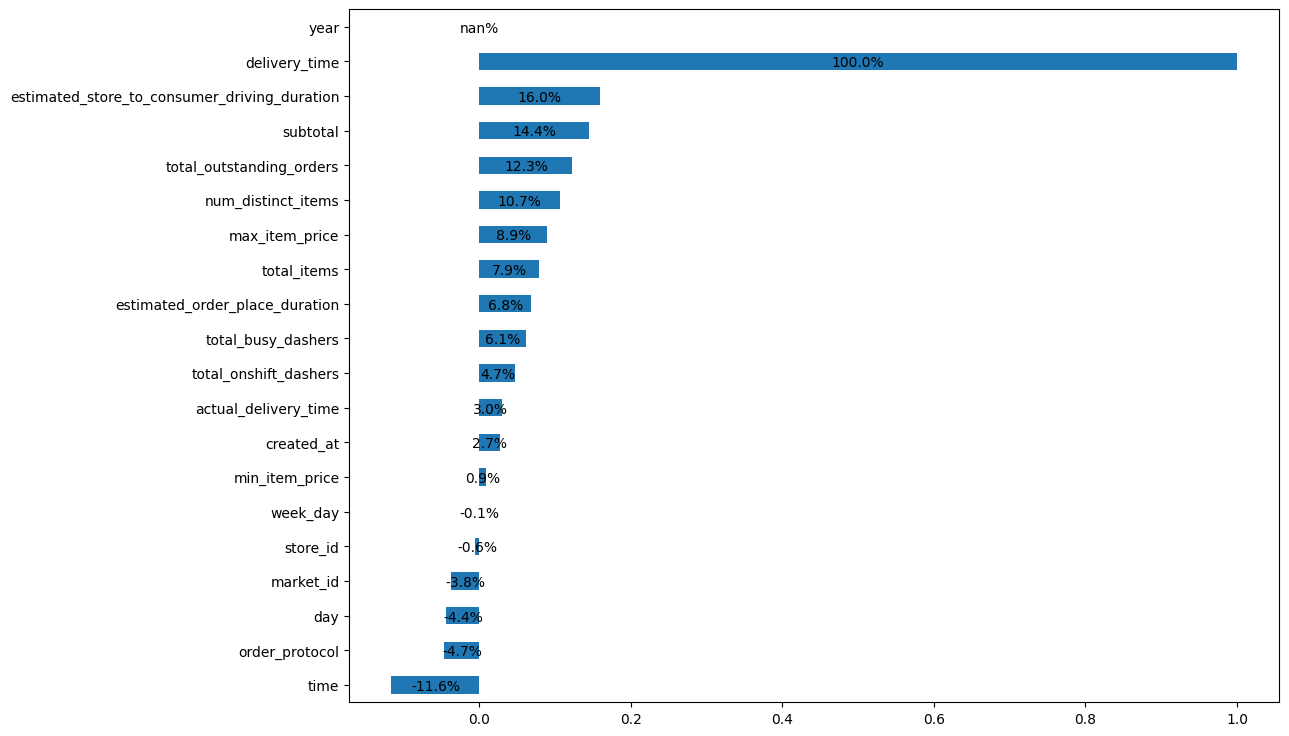

In [89]:
fig , ax = plt.subplots(figsize=(12,9))
ax = cor["delivery_time"].sort_values(ascending=True).plot(kind='barh')
patches = ax.patches 
for i in range(len(patches)):
    x = patches[i].get_width() / 2 
    y = patches[i].get_y() + patches[i].get_height() - 0.4
    ax.annotate(f"{round((cor_vals.values * 100)[i],1)}%",(x,y), ha='center')

In [90]:
num_df.drop(["year","created_at","actual_delivery_time"],axis=1,inplace=True)

C:\Users\solat\AppData\Local\Temp\ipykernel_3052\2493056646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df.drop(["year","created_at","actual_delivery_time"],axis=1,inplace=True)


In [91]:
num_df.shape

(179915, 17)

In [92]:
17*17

289

In [93]:
len(num_df.corr().abs().unstack().sort_values(ascending=False))

289

In [94]:
def get_redundant_pair(only_numeric):
    pairs_to_drop = set()
    for i in range(0, only_numeric.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((only_numeric.columns[i], only_numeric.columns[j]))

    return pairs_to_drop

get_redundant_pair(num_df)

{('day', 'day'),
 ('day', 'delivery_time'),
 ('day', 'estimated_order_place_duration'),
 ('day', 'estimated_store_to_consumer_driving_duration'),
 ('day', 'market_id'),
 ('day', 'max_item_price'),
 ('day', 'min_item_price'),
 ('day', 'num_distinct_items'),
 ('day', 'order_protocol'),
 ('day', 'store_id'),
 ('day', 'subtotal'),
 ('day', 'total_busy_dashers'),
 ('day', 'total_items'),
 ('day', 'total_onshift_dashers'),
 ('day', 'total_outstanding_orders'),
 ('day', 'week_day'),
 ('delivery_time', 'delivery_time'),
 ('delivery_time', 'estimated_order_place_duration'),
 ('delivery_time', 'estimated_store_to_consumer_driving_duration'),
 ('delivery_time', 'market_id'),
 ('delivery_time', 'max_item_price'),
 ('delivery_time', 'min_item_price'),
 ('delivery_time', 'num_distinct_items'),
 ('delivery_time', 'order_protocol'),
 ('delivery_time', 'store_id'),
 ('delivery_time', 'subtotal'),
 ('delivery_time', 'total_busy_dashers'),
 ('delivery_time', 'total_items'),
 ('delivery_time', 'total_onsh

In [95]:
def get_top_abs_correlation(df,n):
    cor = num_df.corr().abs().unstack()
    label_to_drop = get_redundant_pair(df)
    corr = cor.drop(labels=label_to_drop).sort_values(ascending=False)
    return corr[0:n]


get_top_abs_correlation(num_df,20)

total_onshift_dashers                         total_busy_dashers                0.943593
                                              total_outstanding_orders          0.936067
total_busy_dashers                            total_outstanding_orders          0.932774
total_items                                   num_distinct_items                0.759831
subtotal                                      num_distinct_items                0.681499
order_protocol                                estimated_order_place_duration    0.679354
total_items                                   subtotal                          0.556810
min_item_price                                max_item_price                    0.541786
subtotal                                      max_item_price                    0.508781
num_distinct_items                            min_item_price                    0.446273
total_items                                   min_item_price                    0.389653
total_onshift_dashers

In [96]:

print(get_top_abs_correlation(num_df,20))

total_onshift_dashers                         total_busy_dashers                0.943593
                                              total_outstanding_orders          0.936067
total_busy_dashers                            total_outstanding_orders          0.932774
total_items                                   num_distinct_items                0.759831
subtotal                                      num_distinct_items                0.681499
order_protocol                                estimated_order_place_duration    0.679354
total_items                                   subtotal                          0.556810
min_item_price                                max_item_price                    0.541786
subtotal                                      max_item_price                    0.508781
num_distinct_items                            min_item_price                    0.446273
total_items                                   min_item_price                    0.389653
total_onshift_dashers

<Axes: >

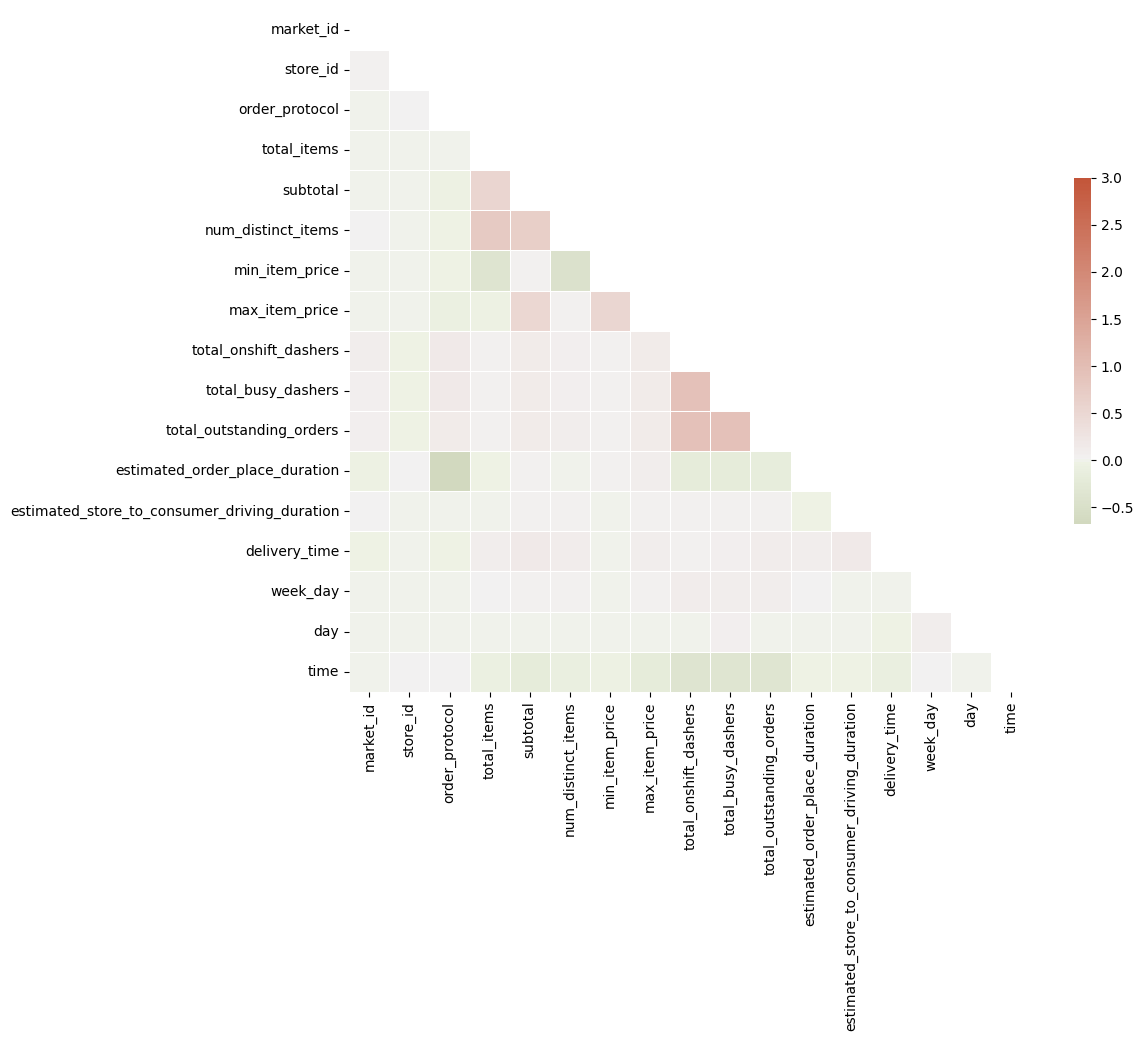

In [105]:
mask = np.triu(np.ones_like(num_df.corr(),dtype=bool))
fig , ax = plt.subplots(figsize=(11,9))

cmap = sns.diverging_palette(100,20,as_cmap=True)

sns.heatmap(num_df.corr(),mask=mask,cmap=cmap,vmax=3,center=0,
            square=True,linewidths=0.5,cbar_kws={'shrink' : 0.5})

In [106]:
num_df.columns

Index(['market_id', 'store_id', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration', 'delivery_time',
       'week_day', 'day', 'time'],
      dtype='object')

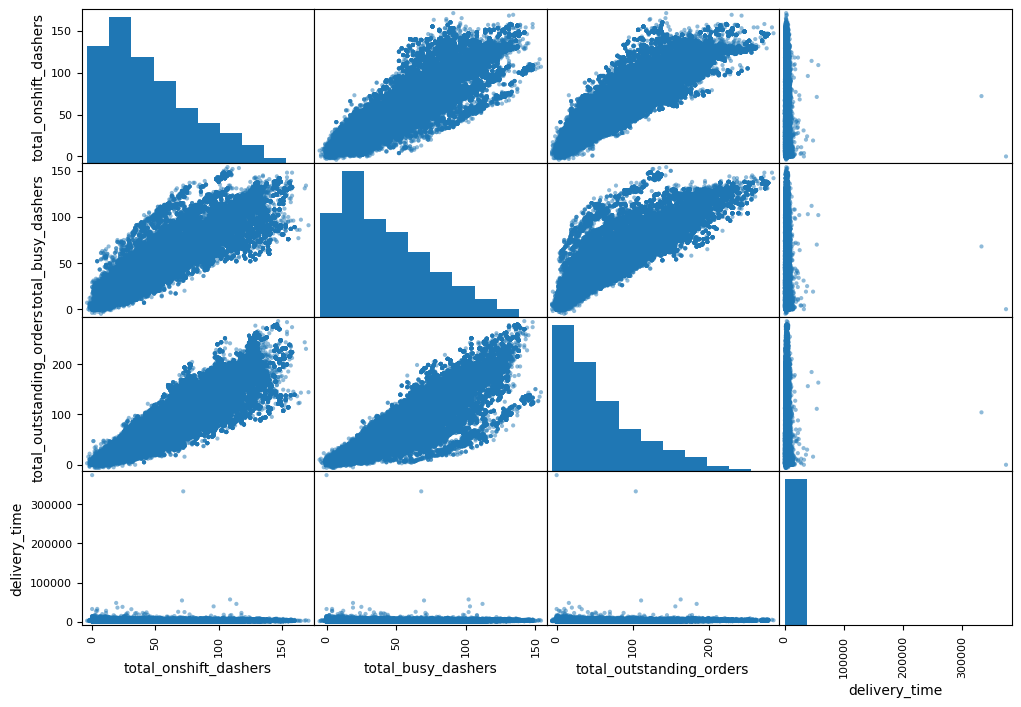

In [111]:
from pandas.plotting import scatter_matrix 
# plt.figure(figsize=(30,30))
scatter_matrix(num_df[["total_onshift_dashers",'total_busy_dashers','total_outstanding_orders','delivery_time']],figsize=(12, 8));

In [116]:
upper_percentile = cleaned_df["delivery_time"].quantile(0.99)
lower_percentile = cleaned_df["delivery_time"].quantile(0.01)

In [120]:
cleaned_df[cleaned_df["delivery_time"] > upper_percentile].sort_values(by="delivery_time",ascending=False)[:5]

,market_id,created_at,actual_delivery_time,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,...,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_time,year,non_null_primary_category,week_day,day,time
168932,4.0,2015-01-28 08:34:06,2015-02-01 16:25:25,6503,5.0,3,1520,3,220,750,...,0.0,0.0,251,476.0,373879.0,2015,dessert,2,28,8
25068,1.0,2015-02-16 02:24:09,2015-02-19 22:45:31,4338,3.0,4,4980,4,995,1795,...,68.0,104.0,251,767.0,332482.0,2015,indian,0,16,2
75394,2.0,2015-02-01 02:18:07,2015-02-01 18:08:39,355,4.0,3,2379,2,389,695,...,102.0,163.0,251,602.0,57032.0,2015,burger,6,1,2
173966,1.0,2015-02-16 02:31:05,2015-02-16 17:38:32,2169,3.0,4,3660,4,375,1195,...,70.0,111.0,251,326.0,54447.0,2015,indian,0,16,2
79005,3.0,2015-02-05 02:11:40,2015-02-05 15:34:38,1764,2.0,3,2185,3,495,995,...,19.0,16.0,251,787.0,48178.0,2015,thai,3,5,2


In [99]:
# X = cleaned_df.drop("delivery_time",axis=1)
# y = cleaned_df["delivery_time"]


In [100]:
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [101]:
# features = ["non_null_primary_category"]
# imputer = Pipeline(steps=[
#     ("target_encoder", TargetEncoder(cv=5,smooth=500,target_type='continuous'))
# ])

# preprocessor = ColumnTransformer(transformers=[
#     ("taeget_encoding", imputer, features)
# ],remainder='passthrough')

# transformer = Pipeline(steps=[("preprocessor", preprocessor)])

# transformed_train_data = transformer.fit_transform(X_train,y_train)
# transformed_test_data = transformer.transform(X_test)
# transformed_train_data

In [102]:
# pd.DataFrame(transformed_train_data)

In [103]:
# transformer.get_feature_names_out(input_features=X.columns)